In [1]:
from unet import UNet
import os, sys
import numpy as np
import torch
from torch.nn import PoissonNLLLoss
import torch.optim as optim


In [2]:
# create model example
# UNet(in_channels=1, n_classes=2, depth=5, wf=6, padding=False, batch_norm=False, up_mode='upconv')
# in_channels (int): number of input channels
#  |          n_classes (int): number of output channels
#  |          depth (int): depth of the network
#  |          wf (int): number of filters in the first layer is 2**wf
#  |          padding (bool): if True, apply padding such that the input shape
#  |                          is the same as the output.
#  |                          This may introduce artifacts
#  |          batch_norm (bool): Use BatchNorm after layers with an
#  |                             activation function
#  |          up_mode (str): one of 'upconv' or 'upsample'.
#  |                         'upconv' will use transposed convolutions for
#  |                         learned upsampling.
#  |                         'upsample' will use bilinear upsampling.

num_x_bands = 12
n_classes = 4

model = UNet(in_channels=num_x_bands, n_classes=n_classes, padding=True)

In [3]:
num_samples = 1
imdim = 256
samp_X = np.random.randint(150, size=(num_samples, num_x_bands, imdim, imdim)).astype('float32')
samp_Y = np.random.randint(n_classes, size=(num_samples, imdim, imdim)).astype('float32')

# make into tensors
x_tensor = torch.from_numpy(samp_X)
y_tensor = torch.from_numpy(samp_Y)

In [4]:
# test the input shape with the model
target = model(x_tensor)

In [5]:
target.shape

torch.Size([1, 4, 256, 256])

In [6]:
from matplotlib import pyplot as plt

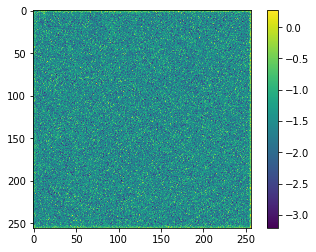

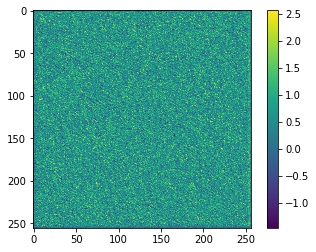

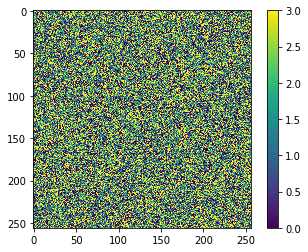

In [7]:
# show the first class probabilities
plt.imshow(target.detach().numpy()[0][0])
plt.colorbar()
plt.show()

# show the second class probabilities
plt.imshow(target.detach().numpy()[0][1])
plt.colorbar()
plt.show()

# show the sample Y
plt.imshow(samp_Y[0])
plt.colorbar()
plt.show()

In [8]:
# do a single training iteration
criterion = PoissonNLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# here you would iterate
losses = []
for i in range(10):
    
    samp_X = np.random.randint(150, size=(num_samples, num_x_bands, imdim, imdim)).astype('float32')
    samp_Y = np.random.randint(n_classes, size=(num_samples, imdim, imdim)).astype('float32')

    # make into tensors
    x_tensor = torch.from_numpy(samp_X)
    y_tensor = torch.from_numpy(samp_Y)

    # zero the parameter gradients
    optimizer.zero_grad()
        
    # forward + backward + optimize
    target = model(x_tensor)
    loss = criterion(target, y_tensor)
    losses.append(loss.data)
    loss.backward()
    optimizer.step()


In [9]:
loss

tensor(0.9536, grad_fn=<MeanBackward1>)

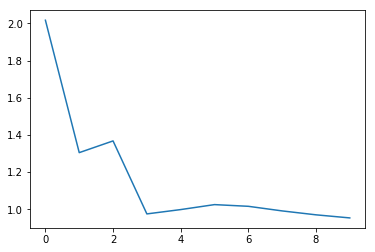

In [10]:
plt.plot(losses)

In [11]:
losses

[tensor(2.0167),
 tensor(1.3047),
 tensor(1.3677),
 tensor(0.9751),
 tensor(0.9984),
 tensor(1.0251),
 tensor(1.0160),
 tensor(0.9912),
 tensor(0.9702),
 tensor(0.9536)]